# Example notebook to load StarStream data releases

In [1]:
import h5py

In [2]:
# print basic info

with  h5py.File("starstream_gaia_dr3_high_quality.hdf5", "r") as f:
    for i, key in enumerate(f.keys()):
        print("%d %s: N_detect = %d"%(i+1, key, f[key]["source_id"].shape[0]))

1 NGC_1261: N_detect = 560
2 NGC_1851: N_detect = 1405
3 NGC_1904: N_detect = 263
4 NGC_2419: N_detect = 138
5 NGC_288: N_detect = 494
6 NGC_362: N_detect = 1030
7 NGC_4147: N_detect = 108
8 NGC_4590: N_detect = 68
9 NGC_5024: N_detect = 686
10 NGC_5053: N_detect = 986
11 NGC_5272: N_detect = 438
12 NGC_5466: N_detect = 162
13 NGC_5634: N_detect = 62
14 NGC_5694: N_detect = 20
15 NGC_5824: N_detect = 131
16 NGC_5897: N_detect = 764
17 NGC_5904: N_detect = 176
18 NGC_6205: N_detect = 2209
19 NGC_6218: N_detect = 806
20 NGC_6229: N_detect = 79
21 NGC_6341: N_detect = 356
22 NGC_6752: N_detect = 478
23 NGC_6934: N_detect = 83
24 NGC_6981: N_detect = 628
25 NGC_7006: N_detect = 108
26 NGC_7078: N_detect = 504
27 NGC_7089: N_detect = 814
28 NGC_7099: N_detect = 728
29 NGC_7492: N_detect = 96
30 Pal_1: N_detect = 445
31 Pal_12: N_detect = 228
32 Pal_14: N_detect = 117
33 Pal_5: N_detect = 131
34 Whiting_1: N_detect = 99


In [3]:
# Load individual stream: Pal 5 as an example

with  h5py.File("starstream_gaia_dr3_high_quality.hdf5", "r") as f:
    stream = f["Pal_5"]
    print(stream.keys())
    
    source_id = stream["source_id"][:]     # Gaia DR3 Source ID
    ra = stream["ra"][:]                   # RA in degree
    dec = stream["dec"][:]                 # Dec in degree
    mura = stream["pmra"][:]               # proper motion in RA (including cos delta)
    mudec = stream["pmdec"][:]             # proper motion in Dec
    G = stream["G"][:]                     # G-band magnitude
    bp_rp = stream["bp_rp"][:]             # BP - RP color
    probability = stream["probability"][:] # Stream propability by StarStream

<KeysViewHDF5 ['G', 'bp_rp', 'dec', 'pmdec', 'pmra', 'probability', 'ra', 'source_id']>


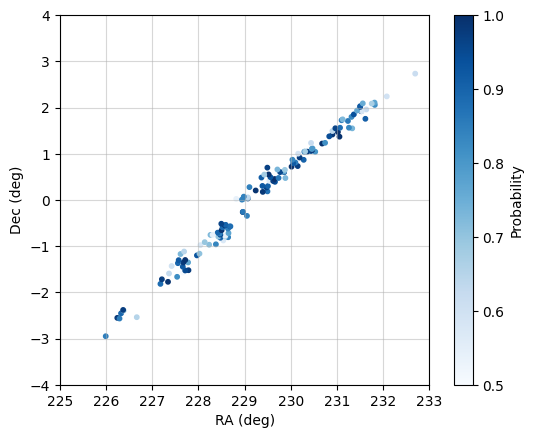

In [4]:
# Make plots

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

im = ax.scatter(ra, dec, c=probability, s=10, cmap="Blues", vmin=0.5, vmax=1)

fig.colorbar(im, ax=ax, label="Probability")

ax.set_aspect("equal")

ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_xlim(225, 233)
ax.set_ylim(-4, 4)

ax.grid(which='both', alpha=0.5)

plt.show()